In [20]:
%matplotlib inline

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [82]:
super = pd.read_csv("Super_C19_G.csv")
super = super.drop('Unnamed: 0', axis = 1)

#Creating cases and deaths columns to later get accruate new cases and deaths
for i in range(3142):
    column_data = 0

super.insert(4, "2020-01-21,1cases", column_data)
super.insert(1096, "2020-01-21,2deaths", column_data)

In [83]:
USData = super.drop(super.columns[[0, 1, 2, 3, -1]], axis=1).sum()

In [84]:
US_Cases = []
US_Deaths = []
for i in range(len(USData.keys())):
    if str(USData.keys()[i][11:13]) != "2d":
        US_Cases.append(USData[i])
    else:
        US_Deaths.append(USData[i])

# print(US_Cases)
# print(US_Deaths)

#Getting the new cases and deaths
NewUS_Cases = []
for i in reversed(range(len(US_Cases))):
    UNC = US_Cases[i] - US_Cases[i - 1]
    if (UNC < 0):
        UNC = 0
    NewUS_Cases.insert(0, UNC)

NewUS_Deaths = []
for i in reversed(range(len(US_Deaths))):
    UND = US_Deaths[i] - US_Deaths[i - 1]
    if (UND < 0):
        UND = 0
    NewUS_Deaths.insert(0, UND)

NewUS_Cases.pop(0)
NewUS_Deaths.pop(0)

0

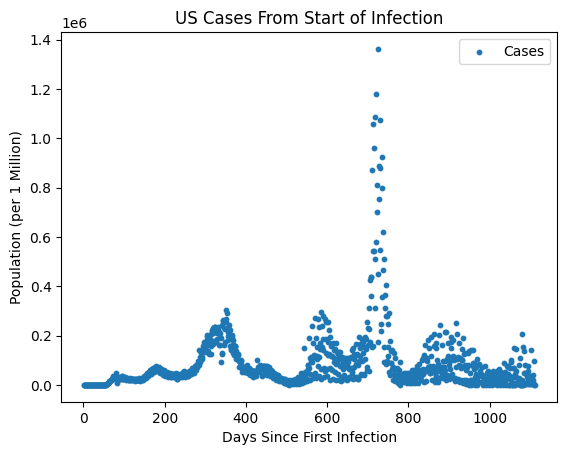

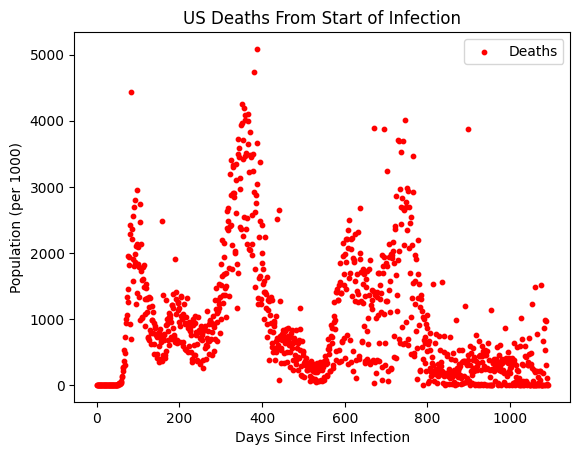

In [85]:
case_data = []
for i in range(len(NewUS_Cases)):
    i += 1
    day_data = i
    case_data.append(day_data)

death_data = []
for i in range(len(NewUS_Deaths)):
    i += 1
    day_data = i
    death_data.append(day_data)

NewUS_Cases = np.array(NewUS_Cases)
NewUS_Deaths = np.array(NewUS_Deaths)
case_data = np.array(case_data)
death_data = np.array(death_data)

plt.scatter(case_data, NewUS_Cases, label='Cases', s = 10)
plt.legend()
plt.title("US Cases From Start of Infection")
plt.xlabel("Days Since First Infection")
plt.ylabel("Population (per 1 Million)")
plt.show()

plt.scatter(death_data, NewUS_Deaths, label='Deaths', c ="red", s = 10)
plt.legend()
plt.title("US Deaths From Start of Infection")
plt.xlabel("Days Since First Infection")
plt.ylabel("Population (per 1000)")
plt.show()

Linear Regression Models

Text(0.5, 1.0, 'U.S. Cases Mean Squared Error: 1.63e+10')

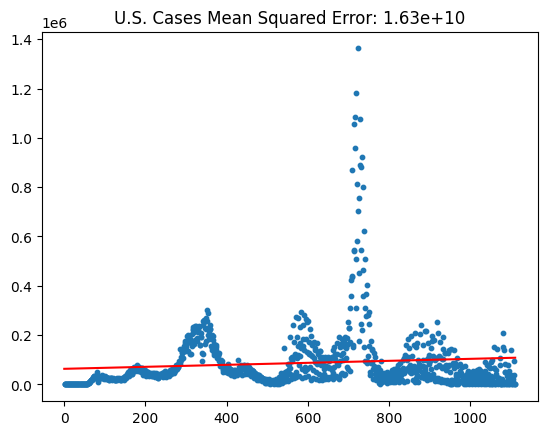

In [112]:
xCases = case_data.reshape((-1, 1))
yCases = NewUS_Cases

cases_model_1 = LinearRegression().fit(xCases, yCases)
y_pred = cases_model_1.predict(xCases)
x_test = np.linspace(0, 1111, 1111)[:, None]

plt.scatter(xCases.ravel(), yCases, s = 10)
plt.plot(x_test.ravel(), y_pred, c ="red")
plt.title("U.S. Cases Mean Squared Error: {0:.3g}".format(mean_squared_error(cases_model_1.predict(xCases), yCases)))

Text(0.5, 1.0, 'U.S. Deaths Mean Squared Error: 8.1e+05')

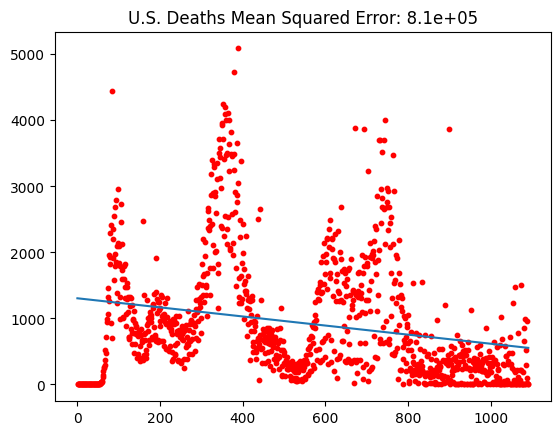

In [89]:
xDeaths = death_data.reshape((-1, 1))
yDeaths = NewUS_Deaths

deaths_model_1 = LinearRegression().fit(xDeaths, yDeaths)
y_pred = deaths_model_1.predict(xDeaths)
x_test = np.linspace(0, 1091, 1091)[:, None]

plt.scatter(xDeaths.ravel(), yDeaths, c ="red", s = 10)
plt.plot(x_test.ravel(), y_pred)
plt.title("U.S. Deaths Mean Squared Error: {0:.3g}".format(mean_squared_error(deaths_model_1.predict(xDeaths), yDeaths)))

Non-Linear (Polynomial) Regression Models

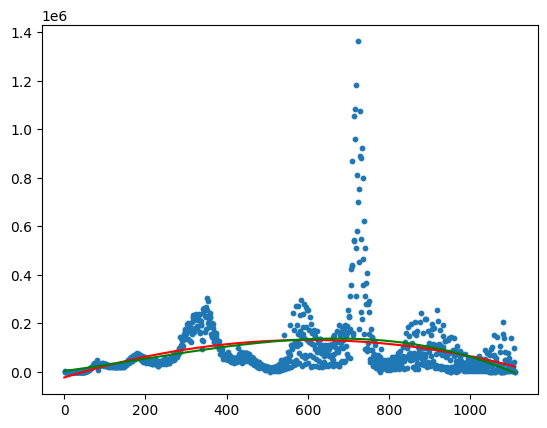

In [206]:
xCases = case_data.reshape((-1, 1))
yCases = NewUS_Cases

cases_nonlin_2 = PolynomialFeatures(degree=2, include_bias=False).fit_transform(xCases)
cases_nonlin_3 = PolynomialFeatures(degree=3, include_bias=False).fit_transform(xCases)
cases_model_2 = LinearRegression().fit(cases_nonlin_2, yCases)
cases_model_3 = LinearRegression().fit(cases_nonlin_3, yCases)

cases_y_pred_2 = cases_model_2.predict(cases_nonlin_2)
cases_y_pred_3 = cases_model_3.predict(cases_nonlin_3)
x_test = np.linspace(0, 1111, 1111)[:, None]

plt.scatter(xCases.ravel(), yCases, s = 10)
plt.plot(x_test.ravel(), cases_y_pred_2, c ="red")
plt.plot(x_test.ravel(), cases_y_pred_3, c ="green")
# plt.title("US Cases Mean Squared Error: {0:.3g}".format(mean_squared_error(model_2.predict(nonlin_2), yCases)))

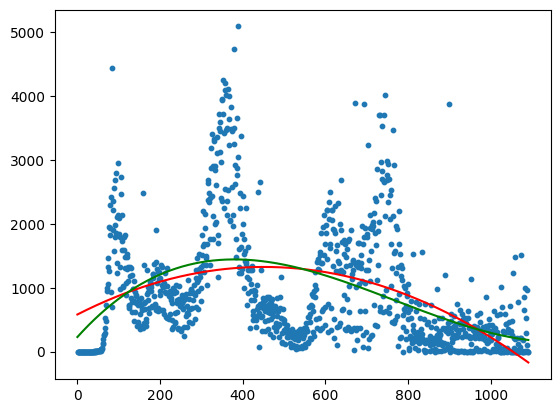

In [207]:
xDeaths = death_data.reshape((-1, 1))
yDeaths = NewUS_Deaths

deaths_nonlin_2 = PolynomialFeatures(degree=2, include_bias=False).fit_transform(xDeaths)
deaths_nonlin_3 = PolynomialFeatures(degree=3, include_bias=False).fit_transform(xDeaths)
deaths_model_2 = LinearRegression().fit(deaths_nonlin_2, yDeaths)
deaths_model_3 = LinearRegression().fit(deaths_nonlin_3, yDeaths)

deaths_y_pred_2 = deaths_model_2.predict(deaths_nonlin_2)
deaths_y_pred_3 = deaths_model_3.predict(deaths_nonlin_3)
x_test = np.linspace(0, 1091, 1091)[:, None]

plt.scatter(xDeaths.ravel(), yDeaths, s = 10)
plt.plot(x_test.ravel(), deaths_y_pred_2, c ="red")
plt.plot(x_test.ravel(), deaths_y_pred_3, c ="green")

In [208]:
dataset_days = 1090
last_day_cases = US_Cases[dataset_days]
last_day_deaths = US_Deaths[dataset_days]
num_pred_days = 90
pred_days = list(range(dataset_days + 1, dataset_days + 1 + num_pred_days))
x_preds = np.array(pred_days).reshape(-1, 1)

In [209]:
cases_x_preds_1 = PolynomialFeatures(degree=1, include_bias=False).fit_transform(x_preds)
cases_x_preds_2 = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x_preds)
cases_x_preds_3 = PolynomialFeatures(degree=3, include_bias=False).fit_transform(x_preds)
cases_1_preds = cases_model_1.predict(cases_x_preds_1)
cases_2_preds = cases_model_2.predict(cases_x_preds_2)
cases_5_preds = cases_model_3.predict(cases_x_preds_3)

deaths_x_preds_1 = PolynomialFeatures(degree=1, include_bias=False).fit_transform(x_preds)
deaths_x_preds_2 = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x_preds)
deaths_x_preds_3 = PolynomialFeatures(degree=3, include_bias=False).fit_transform(x_preds)
deaths_1_preds = deaths_model_1.predict(deaths_x_preds_1)
deaths_2_preds = deaths_model_2.predict(deaths_x_preds_2)
deaths_3_preds = deaths_model_3.predict(deaths_x_preds_3)

In [210]:
cases_1_preds_total = [last_day_cases]
cases_2_preds_total = [last_day_cases]
cases_3_preds_total = [last_day_cases]
deaths_1_preds_total = [last_day_deaths]
deaths_2_preds_total = [last_day_deaths]
deaths_3_preds_total = [last_day_deaths]

for i in range(len(cases_1_preds)):
    cases_1_preds_total.append(cases_1_preds_total[i] + cases_1_preds[i])
    cases_2_preds_total.append(cases_2_preds_total[i] + cases_2_preds[i])
    cases_3_preds_total.append(cases_3_preds_total[i] + cases_5_preds[i])
    deaths_1_preds_total.append(deaths_1_preds_total[i] + deaths_1_preds[i])
    deaths_2_preds_total.append(deaths_2_preds_total[i] + deaths_2_preds[i])
    deaths_3_preds_total.append(deaths_3_preds_total[i] + deaths_3_preds[i])

cases_1_preds_total.pop()
cases_2_preds_total.pop()
cases_3_preds_total.pop()
deaths_1_preds_total.pop()
deaths_2_preds_total.pop()
deaths_3_preds_total.pop()

1010982.147035292

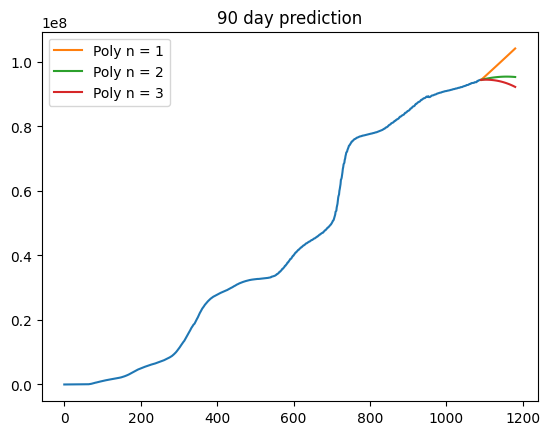

In [212]:
plt.plot(US_Cases[:dataset_days+1])
plt.plot(pred_days, cases_1_preds_total, label='Poly n = 1')
plt.plot(pred_days, cases_2_preds_total, label='Poly n = 2')
plt.plot(pred_days, cases_3_preds_total, label='Poly n = 3')
plt.title('cases 90 day prediction')
plt.legend()


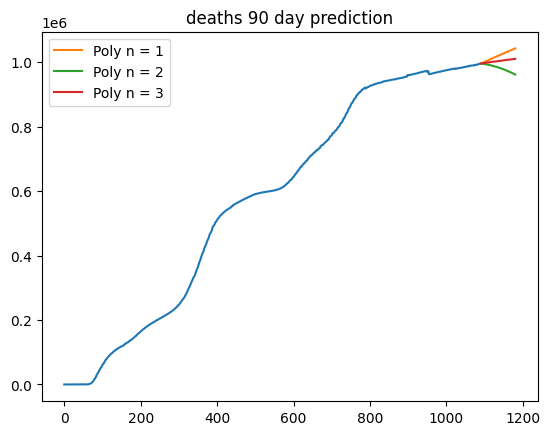

In [213]:
plt.plot(US_Deaths[:dataset_days+1])
plt.plot(pred_days, deaths_1_preds_total, label='Poly n = 1')
plt.plot(pred_days, deaths_2_preds_total, label='Poly n = 2')
plt.plot(pred_days, deaths_3_preds_total, label='Poly n = 3')
plt.title('deaths 90 day prediction')
plt.legend()

Generally, the direction of the regression lines for both cases and deaths seem to be very consistent and flat. This indicates that there is not too much improvement. However, considering the population size of the US, the values being predicted by the regression lines are fairly good as the values are proportionally low.

There are both similarities and differences when it comes to comparing the US covid data with data from other cournties. Big trends are noticeably similar due to new variants spreading very quickly throughout the world. However, the US seems to be doing fairly well when it comes to lowering the number of cases and deaths because the US has more resources to create and provid vaccinations to its population. This is shown through the very low numbers of cases outside the time frame of the worldwide spikes. However, countries in Southeast Asia tend to have larger numbers that last for longer because much of their population does not have access to vaccinations or other means of reducing the spread and severity of covid. 